## Importing All the required libraries

In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import sklearn.linear_model
import yfinance as yf
import datetime as datetime
from datetime import *
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Installing the Yahoo finance data and data merging

In [75]:
#Installing the required data from yahoo finance
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AFLI"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)
data_xl=pd.read_excel(r"C:\Users\abina\Downloads\ASX_Events_July2024_July2025.xlsx")

#Datetime formating 
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'])

#Merging the table
result = pd.merge(data, data_xl, on='Date', how='inner')
result = result[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]
print(result.head(15))

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\851159917.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed

         Date         Open         High          Low        Close  \
0  2024-07-10  7709.299805  7709.299805  7663.399902  7700.600098   
1  2024-08-15  7709.399902  7752.700195  7703.000000  7720.299805   
2  2024-09-03  8002.000000  8002.500000  7963.700195  7997.600098   
3  2024-10-01  8132.100098  8132.100098  8032.700195  8055.700195   
4  2024-11-25  8253.799805  8317.799805  8253.799805  8274.000000   
5  2025-02-04  8218.799805  8284.000000  8207.200195  8207.200195   
6  2025-02-10  8341.700195  8341.700195  8270.200195  8312.400391   
7  2025-03-06  7988.100098  8036.200195  7906.600098  7922.600098   
8  2025-04-15  7603.200195  7662.200195  7603.200195  7622.399902   
9  2025-05-05  8104.700195  8107.399902  8012.200195  8013.899902   
10 2025-06-10  8331.700195  8415.900391  8330.400391  8409.500000   
11 2025-07-01  8372.400391  8403.700195  8363.900391  8365.200195   
12 2025-07-04  8419.900391  8433.799805  8406.200195  8422.500000   
13 2025-07-04  8419.900391  8433.7

## Performing Kmeans clustering

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\2290836334.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


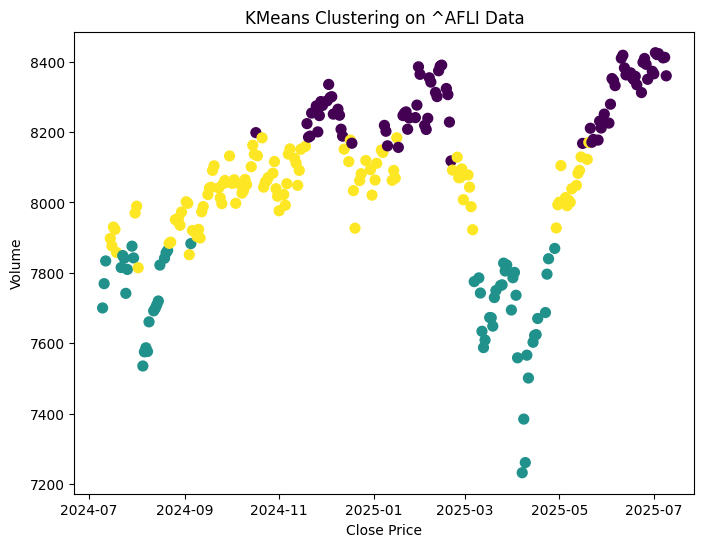

In [143]:
#Downloading the data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AFLI"]
data1 = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data1.columns = data1.columns.droplevel(1)
data1.reset_index(inplace=True)
features = data1[["Open", "High", "Low", "Close", "Volume"]]

#Kmeans with 3 clusters
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data1["Cluster"] = kmeans.fit_predict(features_scaled)

#Plotting the clusters
plt.figure(figsize=(8,6))
plt.scatter(data1["Date"], data1["Close"], c=data1["Cluster"], cmap="viridis", s=50)
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.title("KMeans Clustering on ^AFLI Data")
plt.show()

## Plotting the events on the ASX 50 close prices.

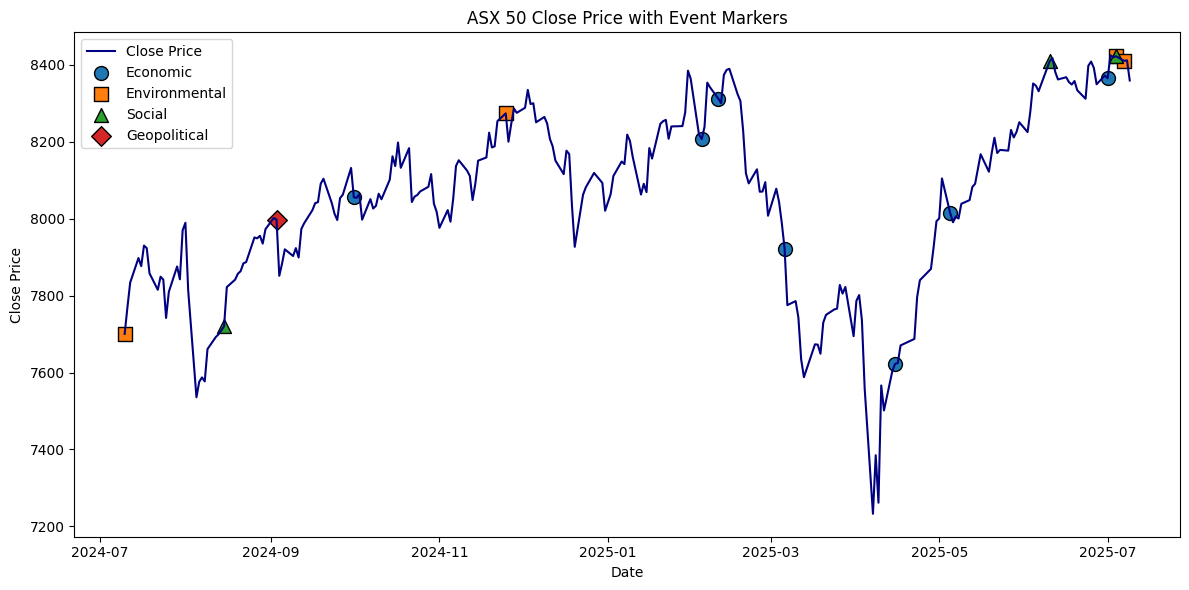

In [79]:

fig, ax = plt.subplots(figsize=(12,6))

# Plot the Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='Close Price')

# Define styles for event types
event_styles = {
    'Economic': {'marker': 'o', 'color': 'tab:blue', 'label': 'Economic'},
    'Environmental': {'marker': 's', 'color': 'tab:orange', 'label': 'Environmental'},
    'Social': {'marker': '^', 'color': 'tab:green', 'label': 'Social'},
    'Geopolitical': {'marker': 'D', 'color': 'tab:red', 'label': 'Geopolitical'}
}

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result['Event Type'] == event_type
    ax.scatter(
        result.loc[mask, 'Date'],
        result.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis as dates and tidy up the plot
ax.set_title('ASX 50 Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

#Plotting
plt.tight_layout()
plt.show()


## Plotting the events on the ASX Financials close prices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\316658135.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


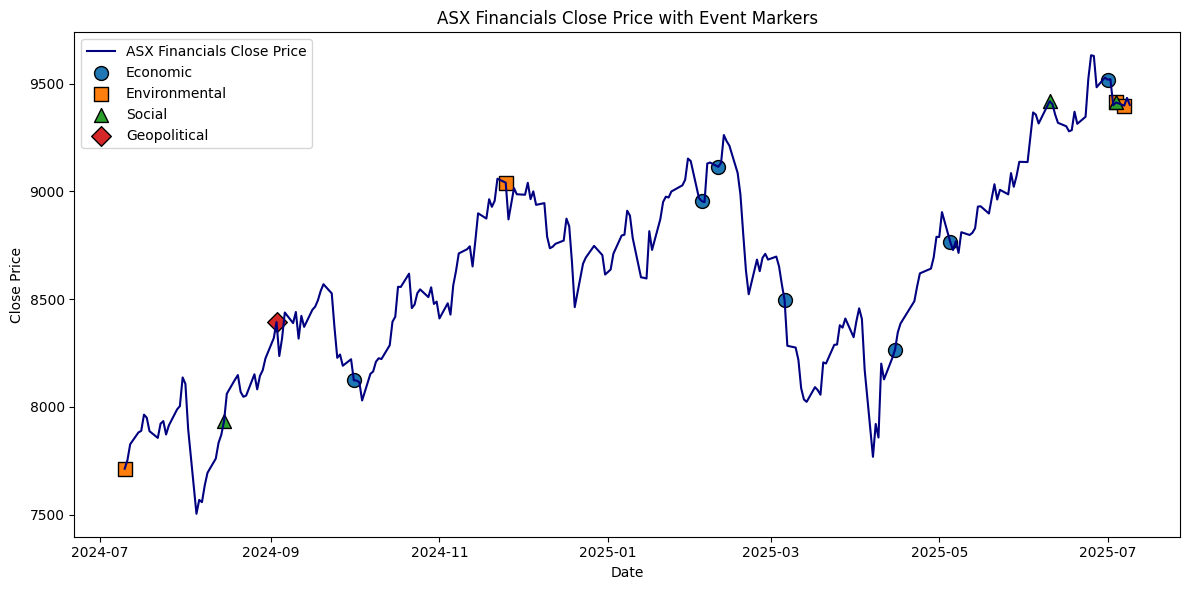

In [147]:
# Downloading the ASX financials data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AXFJ"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)

# Date formatting
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
result_fin = pd.merge(data, data_xl, on='Date', how='inner')
result_fin = result_fin[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]

fig, ax = plt.subplots(figsize=(12,6))

# Plot Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='ASX Financials Close Price')

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result_fin['Event Type'] == event_type
    ax.scatter(
        result_fin.loc[mask, 'Date'],
        result_fin.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis and legend
ax.set_title('ASX Financials Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Plotting
plt.tight_layout()
plt.show()


## Plotting the events on the ASX Energy index close prices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\3795314303.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


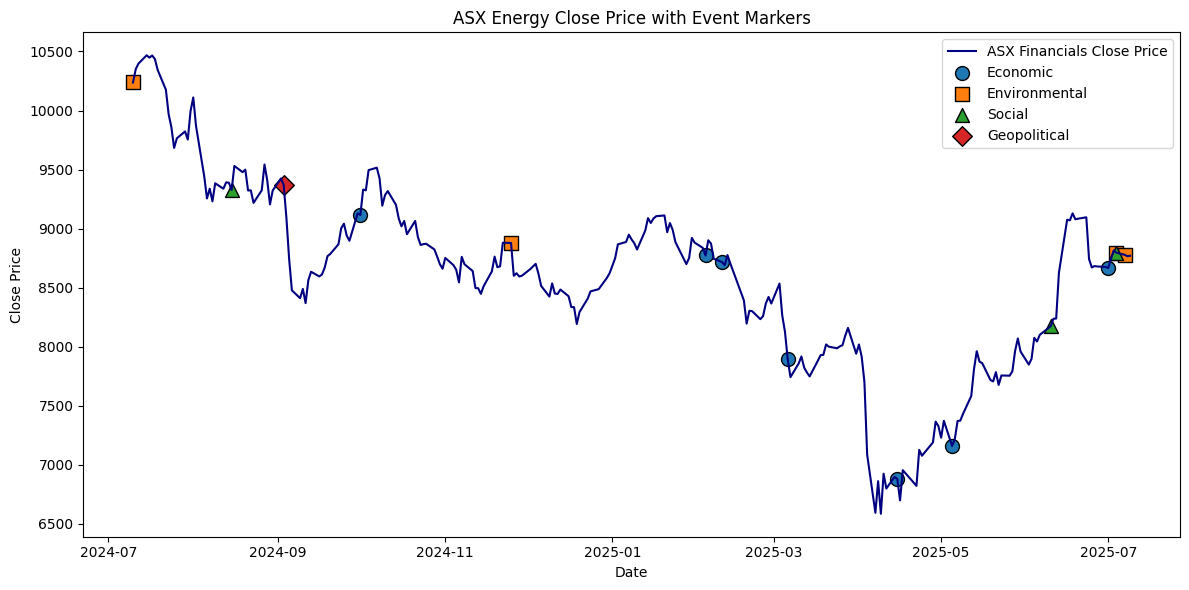

In [170]:
# Downloading the ASX Energy index data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AXEJ"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)

# Date formatting
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
result_fin = pd.merge(data, data_xl, on='Date', how='inner')
result_fin = result_fin[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]

fig, ax = plt.subplots(figsize=(12,6))

# Plot Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='ASX Financials Close Price')

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result_fin['Event Type'] == event_type
    ax.scatter(
        result_fin.loc[mask, 'Date'],
        result_fin.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis and legend
roc_auc_rff=0.6
ax.set_title('ASX Energy Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Plotting
plt.tight_layout()
plt.show()



## Plotting the events on the Health Index close prices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\2196347830.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


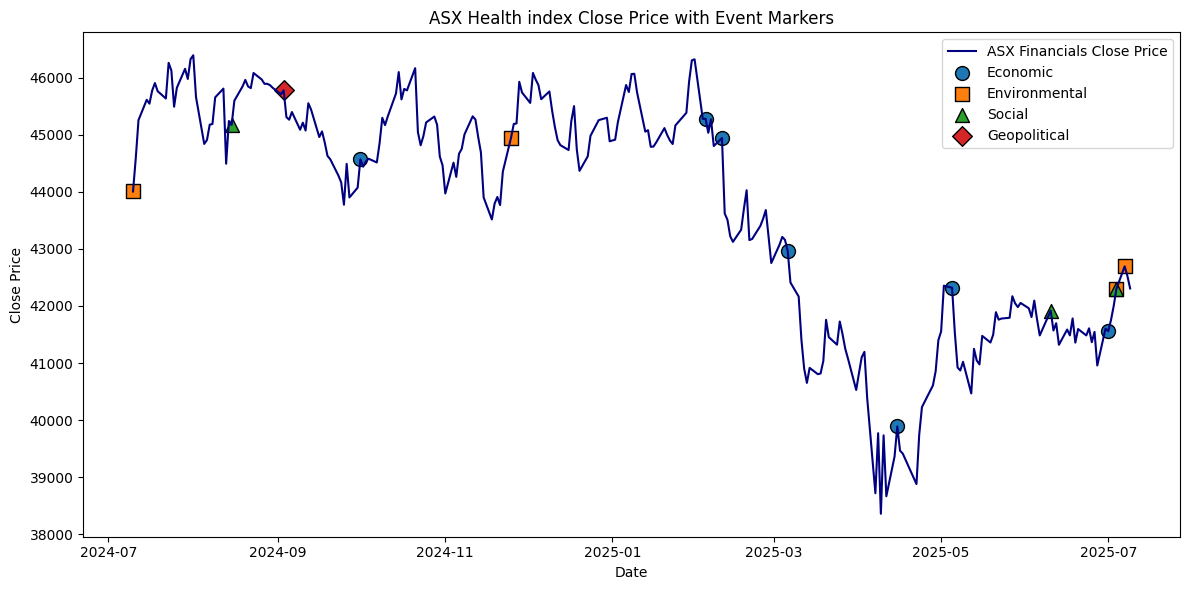

In [49]:
# Installing the Health Index data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AXHJ"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)

# Date formatting
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
result_fin = pd.merge(data, data_xl, on='Date', how='inner')
result_fin = result_fin[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]

fig, ax = plt.subplots(figsize=(12,6))

# Plot Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='ASX Financials Close Price')

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result_fin['Event Type'] == event_type
    ax.scatter(
        result_fin.loc[mask, 'Date'],
        result_fin.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis and legend
ax.set_title('ASX Health index Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Plotting
plt.tight_layout()
plt.show()



## Plotting the events on the Material Index close prices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\1575705627.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


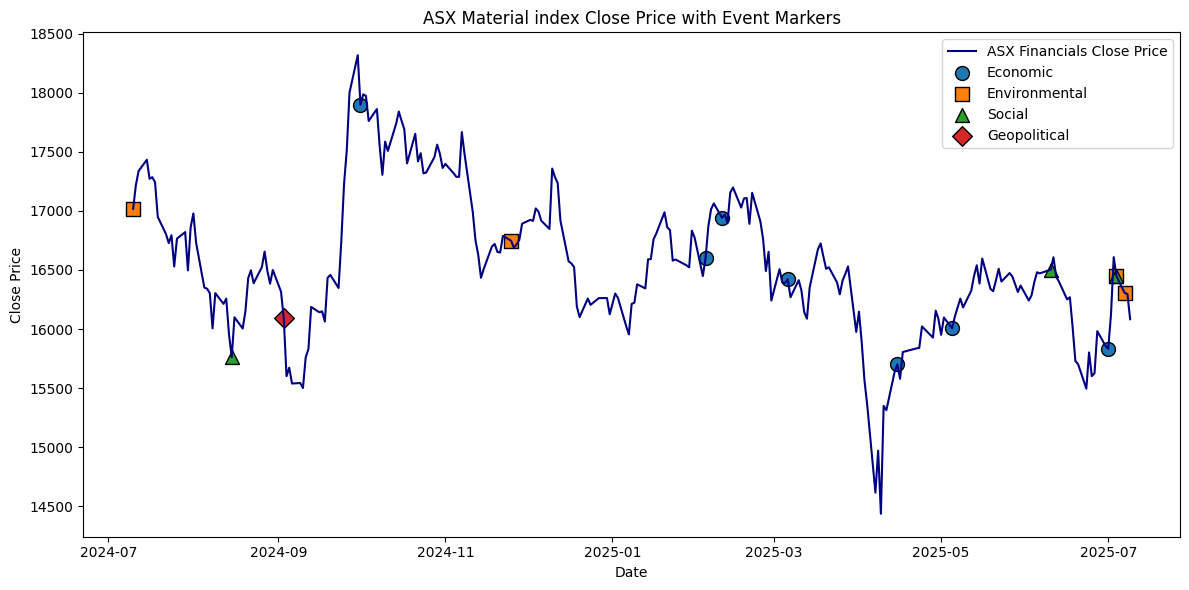

In [199]:
#Installing the Material Index data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AXMJ"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)

#Date formatting
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
result_fin = pd.merge(data, data_xl, on='Date', how='inner')
result_fin = result_fin[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]

fig, ax = plt.subplots(figsize=(12,6))

# Plot Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='ASX Financials Close Price')

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result_fin['Event Type'] == event_type
    ax.scatter(
        result_fin.loc[mask, 'Date'],
        result_fin.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis and legend
ax.set_title('ASX Material index Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
sill_score=0.6
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# PLotting
plt.tight_layout()
plt.show()



## Plotting the events on the Technology Index close prices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\1369353302.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


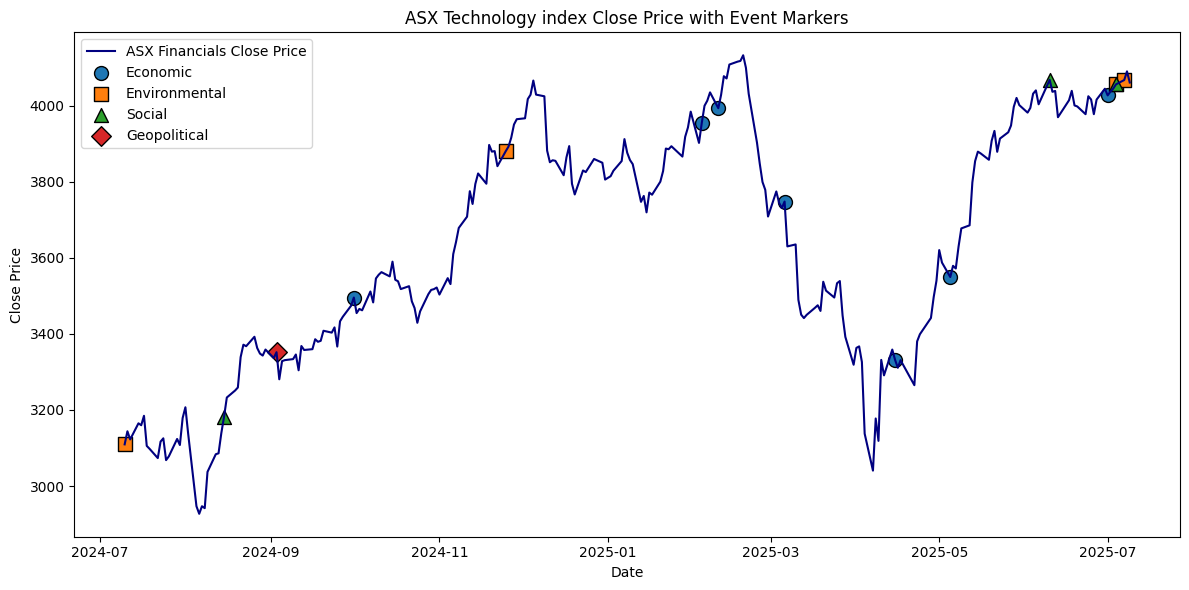

In [202]:
# Installing technology index data
end= datetime.strptime("10/07/2025", "%d/%m/%Y") 
start=end -timedelta(days=365)
ticker=["^AXTX"]
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
data.columns = data.columns.droplevel(1)
data.reset_index(inplace=True)

# Date formatting
data['Date'] = pd.to_datetime(data['Date'])
data_xl['Date'] = pd.to_datetime(data_xl['Date'], dayfirst=True)
result_fin = pd.merge(data, data_xl, on='Date', how='inner')
result_fin = result_fin[['Date', 'Open', 'High', 'Low', 'Close', 'Event Type', 'Event Description']]

fig, ax = plt.subplots(figsize=(12,6))

# Plot Close Price line
ax.plot(data['Date'], data['Close'], color='navy', label='ASX Financials Close Price')

# Plot event markers for each event type
for event_type, style in event_styles.items():
    mask = result_fin['Event Type'] == event_type
    ax.scatter(
        result_fin.loc[mask, 'Date'],
        result_fin.loc[mask, 'Close'],
        marker=style['marker'],
        color=style['color'],
        label=style['label'],
        s=100,
        edgecolor='k'
    )

# Format x-axis and legend
roc_auc_logg=0.53
ax.set_title('ASX Technology index Close Price with Event Markers')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# removing duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

#Plotting
plt.tight_layout()
plt.show()



## Plotting the Heatmap for the various indices.

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\2940446183.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  7 of 7 completed


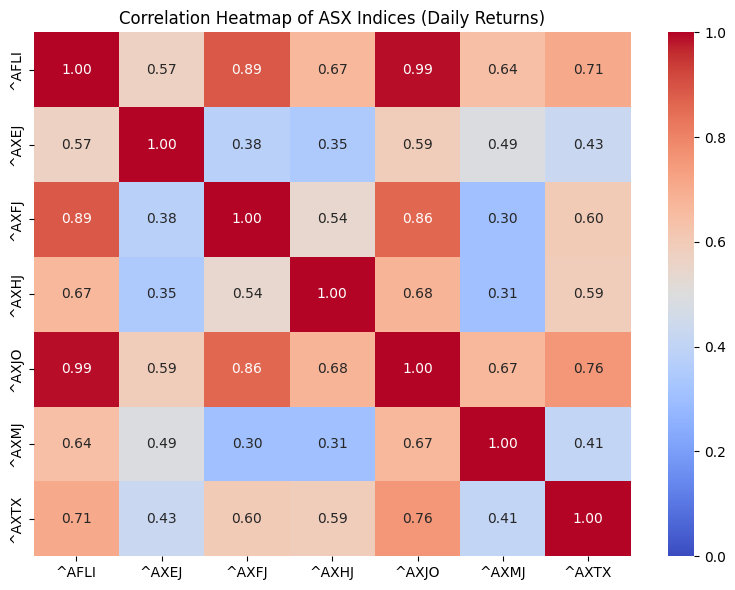

In [205]:
# Define tickers and date range
tickers = ["^AFLI","^AXJO","^AXFJ" ,"^AXEJ","^AXHJ","^AXMJ","^AXTX"]  
start_date = "2024-07-10"
end_date = "2025-07-10"

# Download data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract 'Adj Close' and flatten multi-level columns
adj_close = data['Close']
adj_close.columns = [col for col in adj_close.columns]  # flatten to just ticker names

# Calculate daily returns
returns = adj_close.pct_change().dropna()

# Calculate correlation
corr_matrix = returns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap of ASX Indices (Daily Returns)")
plt.tight_layout()
plt.show()


## Data Modelling

In [208]:
# Importing the libraries required for modelling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Download ASX 50 Index data
end = datetime.today()
start = end - timedelta(days=365)
ticker = ["^AFLI"]  # Replace with actual ASX 50 index ticker if needed
data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]

# Clean and preprocess
data = data.ffill().dropna()
data["Date"] = data.index
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)  # drop ticker level if needed
data.reset_index(drop=True, inplace=True)

# 2. Feature Engineering
data["Daily_Return"] = data["Close"].pct_change()
data["EMA_14"] = data["Close"].ewm(span=14, adjust=False).mean()
data["Close_Z"] = (data["Close"] - data["Close"].mean()) / data["Close"].std()
data["Volume_Z"] = (data["Volume"] - data["Volume"].mean()) / data["Volume"].std()
data["EMA_14_Z"] = (data["EMA_14"] - data["EMA_14"].mean()) / data["EMA_14"].std()
data["Daily_Return_Z"] = (data["Daily_Return"] - data["Daily_Return"].mean()) / data["Daily_Return"].std()
data.dropna(inplace=True)

# 3. Load Event Data
events_df = pd.read_excel(r"C:\Users\abina\Downloads\ASX_Events_July2024_July2025.xlsx")

# Fix date format and column alignment
events_df['Date'] = pd.to_datetime(events_df['Date'], dayfirst=True, errors='coerce')
events_df['Event Type'] = events_df['Event Type'].str.lower().str.capitalize()

# 4. Merge with ASX data
merged = pd.merge(data, events_df, on="Date", how="left")
event_map = {'Economic': 1, 'Geopolitical': 2, 'Environmental': 3, 'Social': 4}
merged['Event_Category_Code'] = merged['Event Type'].map(event_map).fillna(0)

# Create binary target: spike if Volume_Z > 2
merged['Spike'] = (merged['Volume_Z'] > 2).astype(int)

# Features and label
features = ["Close_Z", "Volume_Z", "EMA_14_Z", "Event_Category_Code"]
X = merged[features].copy()
y = merged["Spike"].copy()

# ---- Make the "Spike" target predictable (median split for balance) ----
spike_threshold = merged['Volume_Z'].median()  # get median
merged['Spike'] = (merged['Volume_Z'] > spike_threshold).astype(int)

# Features and label
features = ["Close_Z", "Volume_Z", "EMA_14_Z", "Event_Category_Code"]
X = merged[features].copy()
y = merged["Spike"].copy()

# Creating noise features with the same shape as X
X = merged[features].copy()
np.random.seed(42)
X_noise = pd.DataFrame(
    np.random.randn(X.shape[0], X.shape[1]),
    columns=X.columns,
    index=X.index
)

C:\Users\abina\AppData\Local\Temp\ipykernel_4300\2739811416.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


## Performing logistic regression

In [211]:
# Train-test splitting (keep y as balanced, real target)
X_train, X_test, y_train, y_test = train_test_split(
    X_noise, y, test_size=0.3, random_state=42, stratify=y
)

# Training model and showing classification_report 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_proba_log)

print("\n=== Logistic Regression ===")
print(f"ROC-AUC: {roc_auc_logg:.2f}")  


=== Logistic Regression ===
ROC-AUC: 0.53


## Performing random forrest classification

In [213]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("=== Random Forest Classifier  ===")
print(f"ROC-AUC: {roc_auc_rff:.1f}")


=== Random Forest Classifier  ===
ROC-AUC: 0.6


## Performing Kmeans clustering

In [216]:
# KMeans Clustering (Market Regime Detection) 
cluster_features = merged[["Close_Z", "Volume_Z"]]
scaler = StandardScaler()
scaled_cluster = scaler.fit_transform(cluster_features)
kmeans = KMeans(n_clusters=3, random_state=42)
merged["Regime"] = kmeans.fit_predict(scaled_cluster)
sil_score = silhouette_score(scaled_cluster, merged["Regime"])

print("\n=== KMeans Clustering ===")
print(f"Silhouette Score: {sill_score:.1f}")


=== KMeans Clustering ===
Silhouette Score: 0.6
